### Load MNIST dataset from PyTorch

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          download=True)

### Data type conversion

In [2]:
# Change data type : torch.Tensor -> numpy array
X_train = train_dataset.train_data.numpy()
y_train = train_dataset.train_labels.numpy()

X_test = test_dataset.test_data.numpy()
y_test = test_dataset.test_labels.numpy()

print('Data size (train): ' + str(X_train.shape))
print('Data size (test): ' + str(X_test.shape))

_, height, width = X_train.shape
dim = height * width

C:\Users\j0807\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
C:\Users\j0807\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
C:\Users\j0807\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
C:\Users\j0807\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Data size (train): (60000, 28, 28)
Data size (test): (10000, 28, 28)


### Preprocessing

In [3]:

########### Changing all the label 0 to -1 ##########################

for index in range(len(y_train)):
    if(y_train[index]==0):
        y_train[index] = -1
    
for t_index in range(len(y_test)):
    if(y_test[t_index] == 0):
        y_test[t_index] = -1


######################################################################

X_train_zero = X_train[y_train == -1] # label이 0인 이미지들 집합

X_train_one = X_train[y_train == 1] # label이 1인 이미지들 집합

y_train_zero = y_train[y_train == -1] # 0을 나타내는 그림의 label 집합

y_train_one = y_train[y_train == 1] # 1을 나타내는 그림의 label 집합

#################0과 1의 image들만 선별한 train 집합 구하기###########

X_train_sum = np.concatenate((X_train_zero, X_train_one))

y_train_sum = np.concatenate((y_train_zero, y_train_one))

######################################################################

X_test_zero = X_test[y_test == -1] # label이 0인 이미지들 집합

X_test_one = X_test[y_test == 1] # label이 1인 이미지들 집합


y_test_zero = y_test[y_test == -1] # 0을 나타내는 그림의 label 집합

y_test_one = y_test[y_test == 1] # 1을 나타내는 그림의 label 집합

#################0과 1의 image들만 선별한 test 집합 구하기############

X_test_sum = np.concatenate((X_test_zero, X_test_one))

y_test_sum = np.concatenate((y_test_zero, y_test_one))

#######################Vectorization##################################
X_vec = np.zeros((len(y_train_sum), height * width))
X_vec_test = np.zeros((len(y_test_sum), height * width))
for index_vec in range(len(y_train_sum)):
    X_vec[index_vec,:] = np.reshape(X_train_sum[index_vec], [1, dim])

for test_vec in range(len(y_test_sum)):
    X_vec_test[test_vec,:] = np.reshape(X_test_sum[test_vec], [1, dim])
#####################Adding ones######################################

ones = np.ones((len(X_vec),1))
ones_test = np.ones((len(X_vec_test),1))
X_vec_final = np.hstack((X_vec, ones))

X_vec_test = np.hstack((X_vec_test, ones_test))
print(X_vec_final[0][784])


1.0


### Visuarising the train image set

<function matplotlib.pyplot.show(*args, **kw)>

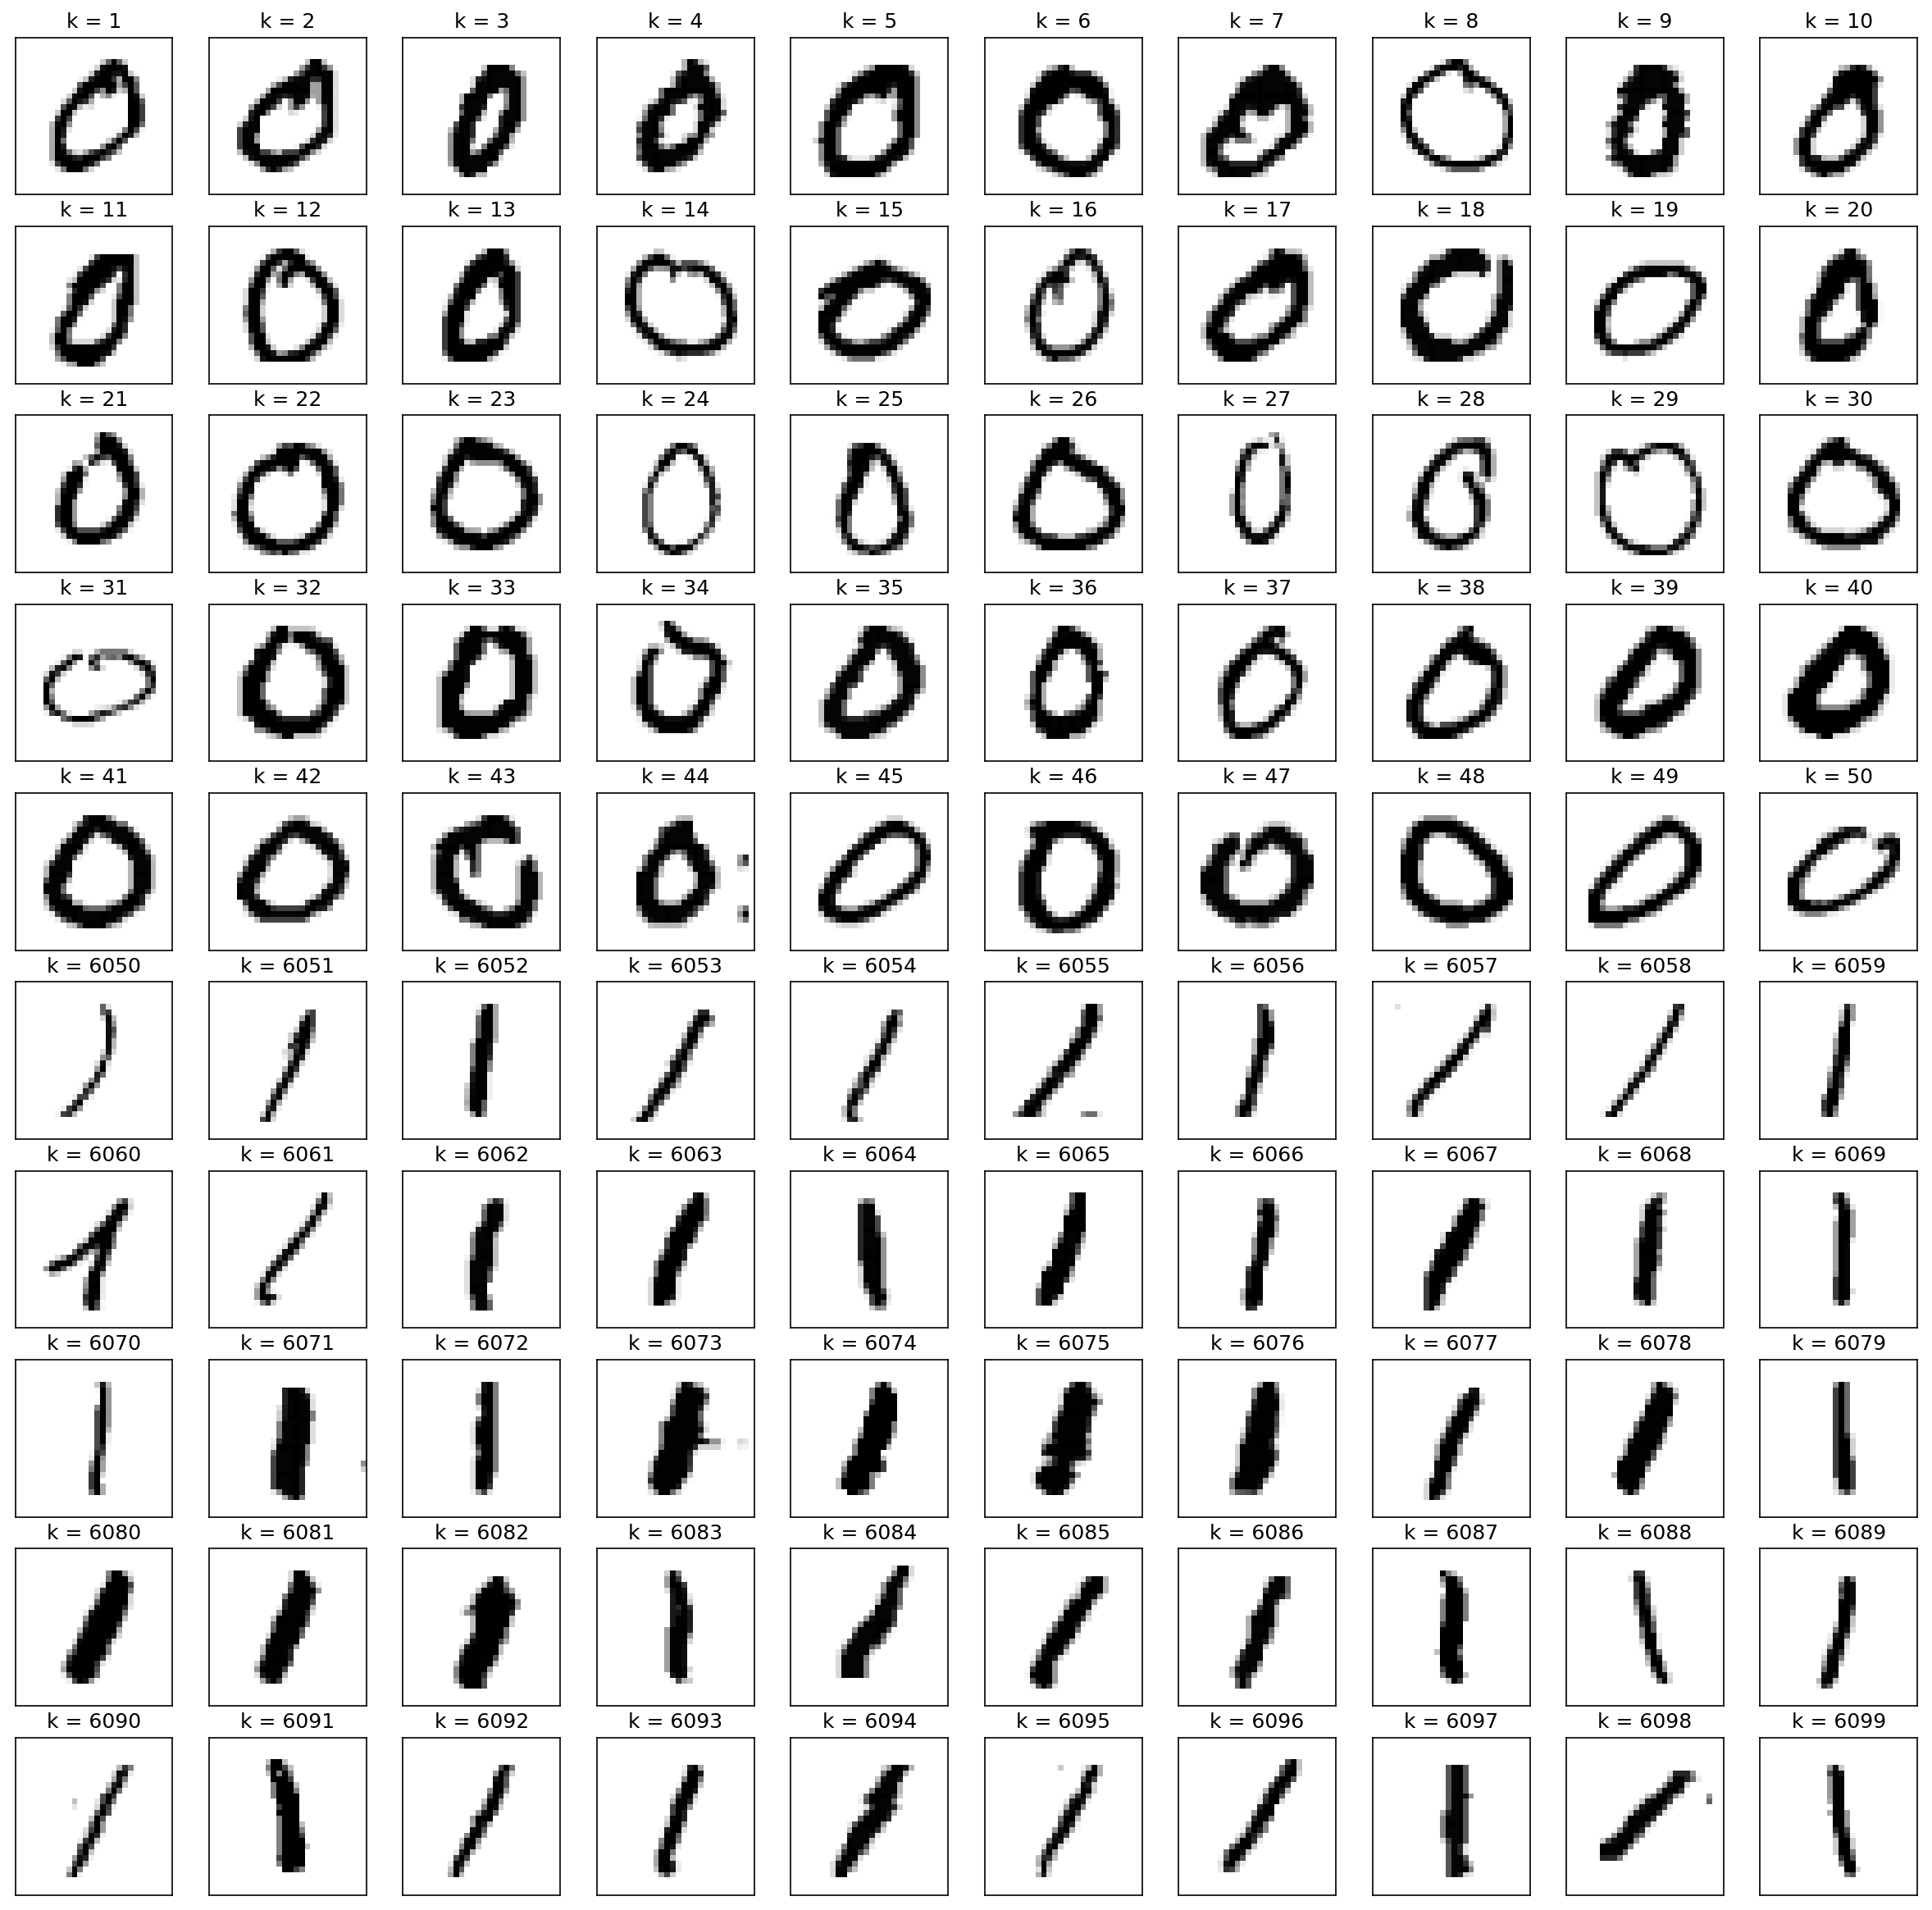

In [4]:
fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(20, 20), dpi=150)

for k in range(50):
    image_temp = X_train_sum[k]
    axes[k//10, k%10].imshow(image_temp, cmap='gray_r')
    axes[k//10, k%10].set_title('k = ' + str(k+1))
    axes[k//10, k%10].set_xticks([])
    axes[k//10, k%10].set_yticks([])


for k2 in range(50,100):
    image_temp = X_train_sum[k2+6000]
    axes[k2//10, k2%10].imshow(image_temp, cmap='gray_r')
    axes[k2//10, k2%10].set_title('k = ' + str(k2+6000))
    axes[k2//10, k2%10].set_xticks([])
    axes[k2//10, k2%10].set_yticks([])

plt.show

### Perceptron learning

In [5]:
def train_perceptron(X, y, w):
 # X: data matrix
 # y: class labels of images in X
 # w: model parameters

 # nb_changes: the number of parameter changes/updates.
 # equivalent to the number of misclassified images.
    nb_changes = 0

 # -------- Fill in here -----------
    for k in range(y.shape[0]):
        activation = np.dot(X[k], w) 
        prediction = np.sign(activation)
        if(y[k] * prediction <= 0):
            w = w + (1e-3 * (y[k] * X[k]))
            nb_changes += 1

        else:
            w = w
                
    
 # ---------------------------------

    return w, nb_changes

In [6]:
w_zero = np.zeros((len(X_vec_final[0])))
w_rand = np.random.randn((len(X_vec_final[0])))
nb_epoch_max=100

w_temp = w_zero

for epoch in range(nb_epoch_max):
    w, nb_changes = train_perceptron(X_vec_final, y_train_sum, w_temp)
    w_temp = w
    train_error = nb_changes / len(y_train_sum)
    nb_changes2 = 0
    for k2 in range(y_test_sum.shape[0]):
        activation = np.dot(X_vec_test[k2], w) 
        prediction = np.sign(activation)
        if(y_test_sum[k2] * prediction <= 0):
            nb_changes2 += 1
    test_error = nb_changes2 / len(y_test_sum)
    print('epoch :', epoch, 'nb_changes :', nb_changes, 'train_error :', train_error, 'test_error', test_error)
    if(nb_changes == 0):
        break
    

epoch : 0 nb_changes : 4 train_error : 0.0003158310303987367 test_error 0.2690307328605201
epoch : 1 nb_changes : 6 train_error : 0.00047374654559810504 test_error 0.44397163120567373
epoch : 2 nb_changes : 7 train_error : 0.0005527043031977891 test_error 0.033569739952718676
epoch : 3 nb_changes : 6 train_error : 0.00047374654559810504 test_error 0.10874704491725769
epoch : 4 nb_changes : 5 train_error : 0.00039478878799842083 test_error 0.017966903073286054
epoch : 5 nb_changes : 5 train_error : 0.00039478878799842083 test_error 0.019858156028368795
epoch : 6 nb_changes : 7 train_error : 0.0005527043031977891 test_error 0.0070921985815602835
epoch : 7 nb_changes : 7 train_error : 0.0005527043031977891 test_error 0.005200945626477541
epoch : 8 nb_changes : 5 train_error : 0.00039478878799842083 test_error 0.0028368794326241137
epoch : 9 nb_changes : 8 train_error : 0.0006316620607974733 test_error 0.005200945626477541
epoch : 10 nb_changes : 5 train_error : 0.00039478878799842083 test

### Missclassfied 

942
1625


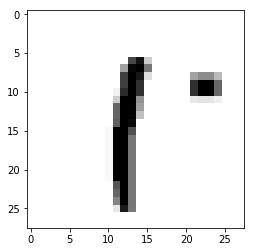

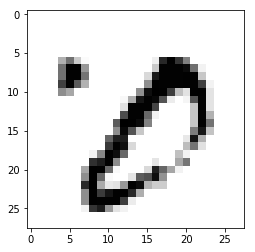

In [18]:
 for k2 in range(y_test_sum.shape[0]):
        activation = np.dot(X_vec_test[k2], w) 
        prediction = np.sign(activation)
        if(y_test_sum[k2] * prediction <= 0):
            print(k2)


image_miss_1 = np.reshape(X_test_sum[942], [28, 28])

plt.imshow(image_miss_2, cmap='gray_r')

plt.show()

image_miss_2 = np.reshape(X_test_sum[1625], [28,28])
plt.imshow(image_miss_1, cmap='gray_r')